# Установка зависимостей

1. Ставим yfinance, так как она не входит в пакет анаконды

In [3]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [36]:
# Импортируем нужные нам библиотеки
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [37]:
# Загрузка списка компаний S&P 500
def get_snp500_tickers():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    table = pd.read_html(url)
    df = table[0]
    return df['Symbol'].tolist(), df

# Скачивание данных о котировках
def download_stock_data(tickers_to_downdload):
    print(tickers_to_downdload)
    data = yf.download(tickers_to_downdload, period="2y", interval="1d", threads=True)
    # group_by='ticker'
    return data

In [38]:
# Загружаем список ценных бумаг из Wiki
tickers, snp500_df = get_snp500_tickers()

In [39]:
tickers[:10]

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [40]:
snp500_df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [41]:
# Если загружать все, то notebook потребляет очень много памяти, работать почти невозможно. Возмем для примера только некоторые из ценных бумаг
test_tickers = ['AAPL', 'GOOG','AMZN', 'MSFT', 'AMD', 'NVDA', 'IBM']

In [42]:
# Получение данных о котировках
stock_data = download_stock_data(test_tickers)  
# Сохраняем данные на будущее, чтобы не качать каждый раз из интернета
stock_data.to_csv('snp500_stock_data.csv')


['AAPL', 'GOOG', 'AMZN', 'MSFT', 'AMD', 'NVDA', 'IBM']


[*********************100%***********************]  7 of 7 completed


In [43]:
stock_data.head()

Price        Adj Close                                               \
Ticker            AAPL        AMD       AMZN       GOOG         IBM   
Date                                                                  
2022-12-05  145.104111  73.620003  91.010002  99.625336  135.535660   
2022-12-06  141.422791  70.269997  88.250000  97.071602  135.618408   
2022-12-07  139.473328  70.139999  88.459999  94.916901  135.406921   
2022-12-08  141.165497  70.470001  90.349998  93.719833  135.875839   
2022-12-09  140.680618  68.589996  89.089996  92.841995  135.204666   

Price                                   Close                        ...  \
Ticker            MSFT       NVDA        AAPL        AMD       AMZN  ...   
Date                                                                 ...   
2022-12-05  246.160233  16.599072  146.630005  73.620003  91.010002  ...   
2022-12-06  241.162247  15.976482  142.910004  70.269997  88.250000  ...   
2022-12-07  240.424362  16.109394  140.940002  70.139999  88.459999  ...   
2022-12-08  243.405441  17.157705  142.649994  70.470001  90.349998  ...   
2022-12-09  241.457397  16.989815  142.160004  68.589996  89.089996  ...   

Price             Open                           Volume                      \
Ticker             IBM        MSFT       NVDA      AAPL       AMD      AMZN   
Date                                                                          
2022-12-05  147.940002  252.009995  16.679001  68826400  47022200  71535500   
2022-12-06  147.300003  250.820007  16.530001  64727200  64965200  75503600   
2022-12-07  147.330002  244.830002  15.772000  69721100  59180100  68086900   
2022-12-08  147.899994  244.839996  16.273001  62128300  56734100  73305900   
2022-12-09  147.399994  244.699997  17.160000  76097000  59058300  67398500   

Price                                               
Ticker          GOOG      IBM      MSFT       NVDA  
Date                                                
2022-12-05  19955500  2784600  23435300  352255000  
2022-12-06  20877600  2847600  22463700  352694000  
2022-12-07  26647900  3971300  20481500  372388000  
2022-12-08  25593200  2665700  22611800  515456000  
2022-12-09  21885300  3047600  20609700  465338000  

[5 rows x 42 columns]

In [44]:
# Загружаем данные из CSV
df = pd.read_csv('snp500_stock_data.csv', header=[0, 1], index_col=0)
df.columns.names = ['Price', 'Date'] # Переименовываем индексное поле из Ticker в Date
df.index = pd.to_datetime(df.index)
df.head()


Price        Adj Close                                               \
Date              AAPL        AMD       AMZN       GOOG         IBM   
Date                                                                  
2022-12-05  145.104111  73.620003  91.010002  99.625336  135.535660   
2022-12-06  141.422791  70.269997  88.250000  97.071602  135.618408   
2022-12-07  139.473328  70.139999  88.459999  94.916901  135.406921   
2022-12-08  141.165497  70.470001  90.349998  93.719833  135.875839   
2022-12-09  140.680618  68.589996  89.089996  92.841995  135.204666   

Price                                   Close                        ...  \
Date              MSFT       NVDA        AAPL        AMD       AMZN  ...   
Date                                                                 ...   
2022-12-05  246.160233  16.599072  146.630005  73.620003  91.010002  ...   
2022-12-06  241.162247  15.976482  142.910004  70.269997  88.250000  ...   
2022-12-07  240.424362  16.109394  140.940002  70.139999  88.459999  ...   
2022-12-08  243.405441  17.157705  142.649994  70.470001  90.349998  ...   
2022-12-09  241.457397  16.989815  142.160004  68.589996  89.089996  ...   

Price             Open                           Volume                      \
Date               IBM        MSFT       NVDA      AAPL       AMD      AMZN   
Date                                                                          
2022-12-05  147.940002  252.009995  16.679001  68826400  47022200  71535500   
2022-12-06  147.300003  250.820007  16.530001  64727200  64965200  75503600   
2022-12-07  147.330002  244.830002  15.772000  69721100  59180100  68086900   
2022-12-08  147.899994  244.839996  16.273001  62128300  56734100  73305900   
2022-12-09  147.399994  244.699997  17.160000  76097000  59058300  67398500   

Price                                               
Date            GOOG      IBM      MSFT       NVDA  
Date                                                
2022-12-05  19955500  2784600  23435300  352255000  
2022-12-06  20877600  2847600  22463700  352694000  
2022-12-07  26647900  3971300  20481500  372388000  
2022-12-08  25593200  2665700  22611800  515456000  
2022-12-09  21885300  3047600  20609700  465338000  

[5 rows x 42 columns]

In [45]:
# Проводим первичный анализ
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-12-05 to 2024-12-02
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  501 non-null    float64
 1   (Adj Close, AMD)   501 non-null    float64
 2   (Adj Close, AMZN)  501 non-null    float64
 3   (Adj Close, GOOG)  501 non-null    float64
 4   (Adj Close, IBM)   501 non-null    float64
 5   (Adj Close, MSFT)  501 non-null    float64
 6   (Adj Close, NVDA)  501 non-null    float64
 7   (Close, AAPL)      501 non-null    float64
 8   (Close, AMD)       501 non-null    float64
 9   (Close, AMZN)      501 non-null    float64
 10  (Close, GOOG)      501 non-null    float64
 11  (Close, IBM)       501 non-null    float64
 12  (Close, MSFT)      501 non-null    float64
 13  (Close, NVDA)      501 non-null    float64
 14  (High, AAPL)       501 non-null    float64
 15  (High, AMD)        501 non-null    float64
 16  (High, 

In [14]:
# Все колонки имеют нужный тип

In [46]:
df.isna().sum() # Проверяем нет ли NULLов

Price      Date
Adj Close  AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Close      AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
High       AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Low        AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Open       AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Volume     AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
dtype: int64

In [47]:
# Провряем есть ли пропуски в датах
expected_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
missing_dates = expected_dates.difference(df.index)

In [48]:
missing_dates

DatetimeIndex(['2022-12-10', '2022-12-11', '2022-12-17', '2022-12-18',
               '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-31',
               '2023-01-01', '2023-01-02',
               ...
               '2024-11-03', '2024-11-09', '2024-11-10', '2024-11-16',
               '2024-11-17', '2024-11-23', '2024-11-24', '2024-11-28',
               '2024-11-30', '2024-12-01'],
              dtype='datetime64[ns]', length=228, freq=None)

In [49]:
# Скорее всего это выходные биржи, добавим их в DF
df = df.reindex(expected_dates)
df.head()

Price        Adj Close                                               \
Date              AAPL        AMD       AMZN       GOOG         IBM   
2022-12-05  145.104111  73.620003  91.010002  99.625336  135.535660   
2022-12-06  141.422791  70.269997  88.250000  97.071602  135.618408   
2022-12-07  139.473328  70.139999  88.459999  94.916901  135.406921   
2022-12-08  141.165497  70.470001  90.349998  93.719833  135.875839   
2022-12-09  140.680618  68.589996  89.089996  92.841995  135.204666   

Price                                   Close                        ...  \
Date              MSFT       NVDA        AAPL        AMD       AMZN  ...   
2022-12-05  246.160233  16.599072  146.630005  73.620003  91.010002  ...   
2022-12-06  241.162247  15.976482  142.910004  70.269997  88.250000  ...   
2022-12-07  240.424362  16.109394  140.940002  70.139999  88.459999  ...   
2022-12-08  243.405441  17.157705  142.649994  70.470001  90.349998  ...   
2022-12-09  241.457397  16.989815  142.160004  68.589996  89.089996  ...   

Price             Open                             Volume              \
Date               IBM        MSFT       NVDA        AAPL         AMD   
2022-12-05  147.940002  252.009995  16.679001  68826400.0  47022200.0   
2022-12-06  147.300003  250.820007  16.530001  64727200.0  64965200.0   
2022-12-07  147.330002  244.830002  15.772000  69721100.0  59180100.0   
2022-12-08  147.899994  244.839996  16.273001  62128300.0  56734100.0   
2022-12-09  147.399994  244.699997  17.160000  76097000.0  59058300.0   

Price                                                                   
Date              AMZN        GOOG        IBM        MSFT         NVDA  
2022-12-05  71535500.0  19955500.0  2784600.0  23435300.0  352255000.0  
2022-12-06  75503600.0  20877600.0  2847600.0  22463700.0  352694000.0  
2022-12-07  68086900.0  26647900.0  3971300.0  20481500.0  372388000.0  
2022-12-08  73305900.0  25593200.0  2665700.0  22611800.0  515456000.0  
2022-12-09  67398500.0  21885300.0  3047600.0  20609700.0  465338000.0  

[5 rows x 42 columns]

In [50]:
# Заполним их данныхми из предыдущего доступного дня
df.ffill(inplace=True)
df

Price        Adj Close                                                  \
Date              AAPL         AMD        AMZN        GOOG         IBM   
2022-12-05  145.104111   73.620003   91.010002   99.625336  135.535660   
2022-12-06  141.422791   70.269997   88.250000   97.071602  135.618408   
2022-12-07  139.473328   70.139999   88.459999   94.916901  135.406921   
2022-12-08  141.165497   70.470001   90.349998   93.719833  135.875839   
2022-12-09  140.680618   68.589996   89.089996   92.841995  135.204666   
...                ...         ...         ...         ...         ...   
2024-11-28  234.929993  136.240005  205.740005  170.820007  226.919998   
2024-11-29  237.330002  137.179993  207.889999  170.490005  227.410004   
2024-11-30  237.330002  137.179993  207.889999  170.490005  227.410004   
2024-12-01  237.330002  137.179993  207.889999  170.490005  227.410004   
2024-12-02  239.589996  142.059998  210.710007  172.979996  227.389999   

Price                                    Close                          ...  \
Date              MSFT        NVDA        AAPL         AMD        AMZN  ...   
2022-12-05  246.160233   16.599072  146.630005   73.620003   91.010002  ...   
2022-12-06  241.162247   15.976482  142.910004   70.269997   88.250000  ...   
2022-12-07  240.424362   16.109394  140.940002   70.139999   88.459999  ...   
2022-12-08  243.405441   17.157705  142.649994   70.470001   90.349998  ...   
2022-12-09  241.457397   16.989815  142.160004   68.589996   89.089996  ...   
...                ...         ...         ...         ...         ...  ...   
2024-11-28  422.989990  135.339996  234.929993  136.240005  205.740005  ...   
2024-11-29  423.459991  138.250000  237.330002  137.179993  207.889999  ...   
2024-11-30  423.459991  138.250000  237.330002  137.179993  207.889999  ...   
2024-12-01  423.459991  138.250000  237.330002  137.179993  207.889999  ...   
2024-12-02  430.980011  138.630005  239.589996  142.059998  210.710007  ...   

Price             Open                              Volume              \
Date               IBM        MSFT        NVDA        AAPL         AMD   
2022-12-05  147.940002  252.009995   16.679001  68826400.0  47022200.0   
2022-12-06  147.300003  250.820007   16.530001  64727200.0  64965200.0   
2022-12-07  147.330002  244.830002   15.772000  69721100.0  59180100.0   
2022-12-08  147.899994  244.839996   16.273001  62128300.0  56734100.0   
2022-12-09  147.399994  244.699997   17.160000  76097000.0  59058300.0   
...                ...         ...         ...         ...         ...   
2024-11-28  228.830002  425.109985  135.009995  33498400.0  30175300.0   
2024-11-29  227.750000  420.089996  136.779999  28481400.0  16085700.0   
2024-11-30  227.750000  420.089996  136.779999  28481400.0  16085700.0   
2024-12-01  227.750000  420.089996  136.779999  28481400.0  16085700.0   
2024-12-02  227.500000  421.570007  138.830002  42439900.0  33025300.0   

Price                                                                   
Date              AMZN        GOOG        IBM        MSFT         NVDA  
2022-12-05  71535500.0  19955500.0  2784600.0  23435300.0  352255000.0  
2022-12-06  75503600.0  20877600.0  2847600.0  22463700.0  352694000.0  
2022-12-07  68086900.0  26647900.0  3971300.0  20481500.0  372388000.0  
2022-12-08  73305900.0  25593200.0  2665700.0  22611800.0  515456000.0  
2022-12-09  67398500.0  21885300.0  3047600.0  20609700.0  465338000.0  
...                ...         ...        ...         ...          ...  
2024-11-28  28061600.0  12433400.0  2995100.0  18332400.0  226370900.0  
2024-11-29  24892400.0   9250700.0  2640300.0  16271900.0  141863200.0  
2024-11-30  24892400.0   9250700.0  2640300.0  16271900.0  141863200.0  
2024-12-01  24892400.0   9250700.0  2640300.0  16271900.0  141863200.0  
2024-12-02  39478000.0  16589400.0  2655900.0  20189300.0  171228500.0  

[729 rows x 42 columns]

In [51]:
# Построим диаграмму
adj_close_df = df['Adj Close']

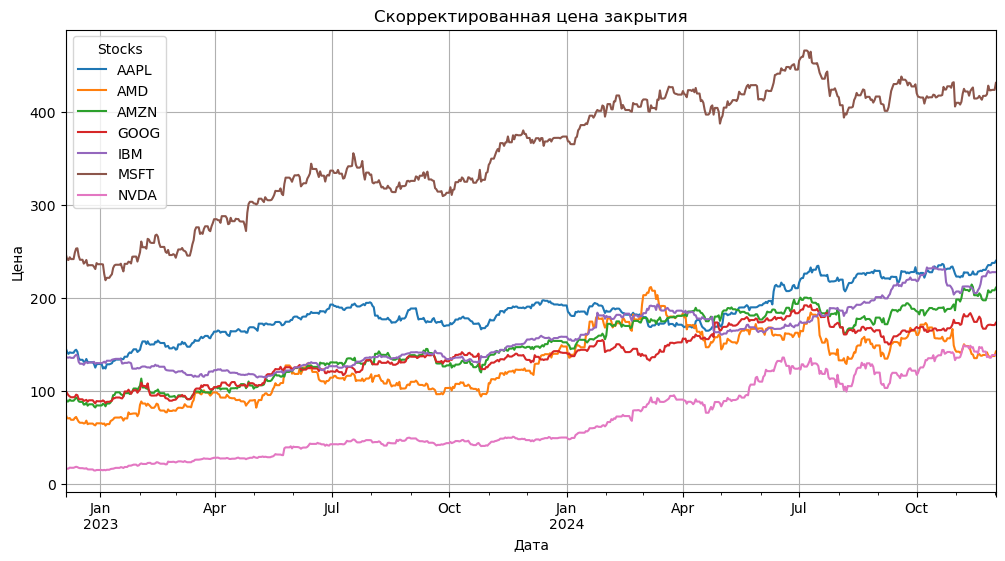

In [52]:
adj_close_df.plot(figsize=(12, 6), title="Скорректированная цена закрытия")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.grid(True)
plt.legend(title="Stocks", loc="upper left")
plt.show()

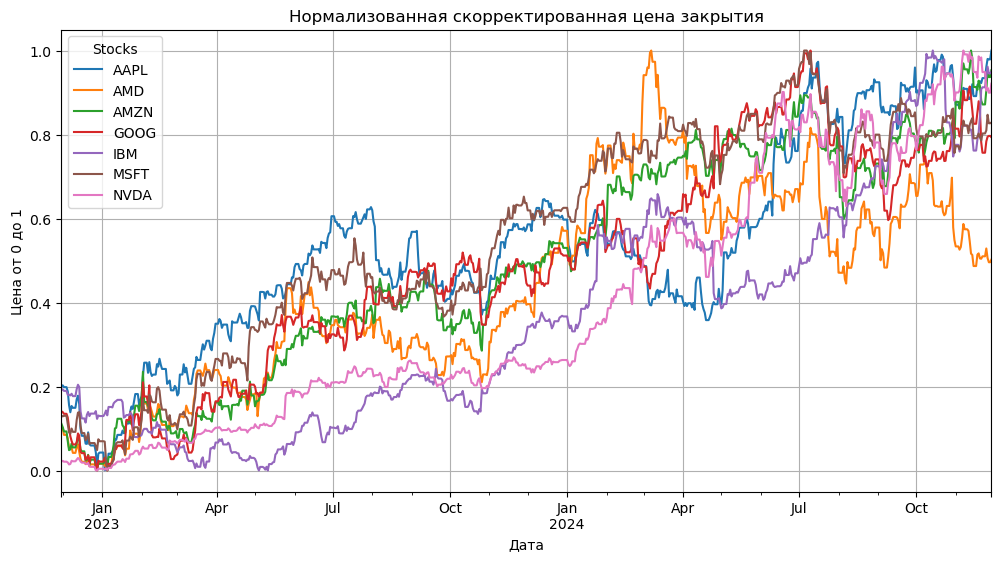

In [23]:
# Нормализуем цену

scaler = MinMaxScaler()
scaled_adj_close = pd.DataFrame(
    scaler.fit_transform(adj_close_df),
    columns=adj_close_df.columns,
    index=adj_close_df.index
)


# Plot the scaled data
scaled_adj_close.plot(figsize=(12, 6), title="Нормализованная скорректированная цена закрытия")
plt.xlabel("Дата")
plt.ylabel("Цена от 0 до 1")
plt.grid(True)
plt.legend(title="Stocks", loc="upper left")
plt.show()

In [24]:
# Ищем выбросы
# Вычисление среднего и стандартного отклонения
mean = scaled_adj_close.mean()
std = scaled_adj_close.std()

# Границы для выбросов
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Фильтрация выбросов
outliers = scaled_adj_close[(scaled_adj_close < lower_bound) | (scaled_adj_close > upper_bound)] # Значения внутри окна должны остаться NULL, а выборосы != NULL

outliers.isna().sum()

Date
AAPL    731
AMD     731
AMZN    731
GOOG    731
IBM     731
MSFT    731
NVDA    731
dtype: int64

In [769]:
# Выбросов по значениям, выходящим за пределы [mean +- 3 * std] не найдено, так как после фильтрации все значения NULL

# Анализ криптовалют

In [25]:
crypto_data = download_stock_data(['BTC-USD', 'ETH-USD', 'SOL-USD', 'XRP-USD'])  

['BTC-USD', 'ETH-USD', 'SOL-USD', 'XRP-USD']


[*********************100%***********************]  4 of 4 completed


In [774]:
crypto_data.head()

Price                         Adj Close                                    \
Ticker                          BTC-USD      ETH-USD    SOL-USD   XRP-USD   
Date                                                                        
2023-11-23 00:00:00+00:00  37289.621094  2062.210693  56.599369  0.620242   
2023-11-24 00:00:00+00:00  37720.281250  2081.152100  56.866440  0.621881   
2023-11-25 00:00:00+00:00  37796.792969  2084.413086  58.846489  0.623444   
2023-11-26 00:00:00+00:00  37479.121094  2063.286133  57.642700  0.616819   
2023-11-27 00:00:00+00:00  37254.167969  2027.417358  55.064621  0.604153   

Price                             Close                                    \
Ticker                          BTC-USD      ETH-USD    SOL-USD   XRP-USD   
Date                                                                        
2023-11-23 00:00:00+00:00  37289.621094  2062.210693  56.599369  0.620242   
2023-11-24 00:00:00+00:00  37720.281250  2081.152100  56.866440  0.621881   
2023-11-25 00:00:00+00:00  37796.792969  2084.413086  58.846489  0.623444   
2023-11-26 00:00:00+00:00  37479.121094  2063.286133  57.642700  0.616819   
2023-11-27 00:00:00+00:00  37254.167969  2027.417358  55.064621  0.604153   

Price                              High               ...        Low  \
Ticker                          BTC-USD      ETH-USD  ...    SOL-USD   
Date                                                  ...              
2023-11-23 00:00:00+00:00  37643.917969  2088.031982  ...  56.287563   
2023-11-24 00:00:00+00:00  38415.339844  2132.481201  ...  56.349091   
2023-11-25 00:00:00+00:00  37892.429688  2091.342773  ...  56.325279   
2023-11-26 00:00:00+00:00  37820.300781  2094.095947  ...  56.511456   
2023-11-27 00:00:00+00:00  37559.355469  2070.606201  ...  53.714470   

Price                                        Open                          \
Ticker                      XRP-USD       BTC-USD      ETH-USD    SOL-USD   
Date                                                                        
2023-11-23 00:00:00+00:00  0.607326  37420.433594  2063.905518  57.578018   
2023-11-24 00:00:00+00:00  0.617526  37296.316406  2062.411865  56.578892   
2023-11-25 00:00:00+00:00  0.616927  37721.414062  2081.296143  56.866287   
2023-11-26 00:00:00+00:00  0.612424  37796.828125  2084.177490  58.845421   
2023-11-27 00:00:00+00:00  0.596738  37454.191406  2062.390869  57.628868   

Price                                     Volume                           \
Ticker                      XRP-USD      BTC-USD      ETH-USD     SOL-USD   
Date                                                                        
2023-11-23 00:00:00+00:00  0.611860  14214948217   7828437946  1379316733   
2023-11-24 00:00:00+00:00  0.620250  22922957823  12141148820  1146346831   
2023-11-25 00:00:00+00:00  0.621858   9099571165   5362623390  1183793273   
2023-11-26 00:00:00+00:00  0.623452  13744796068   8054814154   871154750   
2023-11-27 00:00:00+00:00  0.616747  19002925720  10574810069  1237763215   

Price                                  
Ticker                        XRP-USD  
Date                                   
2023-11-23 00:00:00+00:00  1233580691  
2023-11-24 00:00:00+00:00  1220784875  
2023-11-25 00:00:00+00:00   604505841  
2023-11-26 00:00:00+00:00  1126158902  
2023-11-27 00:00:00+00:00  1209304147  

[5 rows x 24 columns]

In [26]:
crypto_data.to_csv('crypto_data.csv')

In [27]:
# Загружаем данные из CSV
crypto_df = pd.read_csv('crypto_data.csv', header=[0, 1], index_col=0)
crypto_df.columns.names = ['Price', 'Date'] # Переименовываем индексное поле из Ticker в Date
crypto_df.index = pd.to_datetime(crypto_df.index)
crypto_df.head()

Price          Adj Close                                           Close  \
Date             BTC-USD      ETH-USD    SOL-USD   XRP-USD       BTC-USD   
Date                                                                       
2022-11-30  17168.566406  1295.688599  14.115445  0.408743  17168.566406   
2022-12-01  16967.132812  1276.273926  13.480968  0.396708  16967.132812   
2022-12-02  17088.660156  1294.303345  13.715640  0.396273  17088.660156   
2022-12-03  16908.236328  1243.334839  13.302458  0.388147  16908.236328   
2022-12-04  17130.486328  1280.256592  13.718219  0.390735  17130.486328   

Price                                                 High               ...  \
Date            ETH-USD    SOL-USD   XRP-USD       BTC-USD      ETH-USD  ...   
Date                                                                     ...   
2022-11-30  1295.688599  14.115445  0.408743  17190.937500  1302.038696  ...   
2022-12-01  1276.273926  13.480968  0.396708  17197.498047  1295.999878  ...   
2022-12-02  1294.303345  13.715640  0.396273  17088.660156  1294.303345  ...   
2022-12-03  1243.334839  13.302458  0.388147  17116.041016  1299.840332  ...   
2022-12-04  1280.256592  13.718219  0.390735  17157.767578  1281.492310  ...   

Price             Low                    Open                          \
Date          SOL-USD   XRP-USD       BTC-USD      ETH-USD    SOL-USD   
Date                                                                    
2022-11-30  13.308285  0.395180  16445.476562  1216.928711  13.371024   
2022-12-01  13.441185  0.395475  17168.001953  1295.769531  14.133452   
2022-12-02  13.377079  0.385505  16968.683594  1276.328613  13.482586   
2022-12-03  13.278402  0.387611  17090.097656  1294.456543  13.716783   
2022-12-04  13.299368  0.387541  16908.169922  1243.219238  13.301778   

Price                      Volume                                    
Date         XRP-USD      BTC-USD     ETH-USD    SOL-USD    XRP-USD  
Date                                                                 
2022-11-30  0.398553  29523576583  9836925304  331594403  933343511  
2022-12-01  0.408744  22895392882  6857935276  232200065  742091191  
2022-12-02  0.396714  19539705127  6213645709  245049936  778302835  
2022-12-03  0.396271  16217776704  5672609405  161314094  496500336  
2022-12-04  0.388122  16824520830  5174128454  141802483  450960651  

[5 rows x 24 columns]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2022-11-30 to 2024-11-29
Freq: D
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  731 non-null    float64
 1   (Adj Close, AMD)   731 non-null    float64
 2   (Adj Close, AMZN)  731 non-null    float64
 3   (Adj Close, GOOG)  731 non-null    float64
 4   (Adj Close, IBM)   731 non-null    float64
 5   (Adj Close, MSFT)  731 non-null    float64
 6   (Adj Close, NVDA)  731 non-null    float64
 7   (Close, AAPL)      731 non-null    float64
 8   (Close, AMD)       731 non-null    float64
 9   (Close, AMZN)      731 non-null    float64
 10  (Close, GOOG)      731 non-null    float64
 11  (Close, IBM)       731 non-null    float64
 12  (Close, MSFT)      731 non-null    float64
 13  (Close, NVDA)      731 non-null    float64
 14  (High, AAPL)       731 non-null    float64
 15  (High, AMD)        731 non-null    float64
 16 

In [29]:
df.isna().sum() # Нулов нет

Price      Date
Adj Close  AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Close      AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
High       AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Low        AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Open       AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
Volume     AAPL    0
           AMD     0
           AMZN    0
           GOOG    0
           IBM     0
           MSFT    0
           NVDA    0
dtype: int64

In [30]:
# пропусков дат по идее быть не должно, но проверим:
# Провряем есть ли пропуски в датах
expected_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
missing_dates = expected_dates.difference(df.index)
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [31]:
adj_close_crypto_df = crypto_df['Adj Close']
adj_close_crypto_df.head()

Date,BTC-USD,ETH-USD,SOL-USD,XRP-USD
Date,,,,
2022-11-30,17168.566406,1295.688599,14.115445,0.408743
2022-12-01,16967.132812,1276.273926,13.480968,0.396708
2022-12-02,17088.660156,1294.303345,13.715640,0.396273
2022-12-03,16908.236328,1243.334839,13.302458,0.388147
2022-12-04,17130.486328,1280.256592,13.718219,0.390735


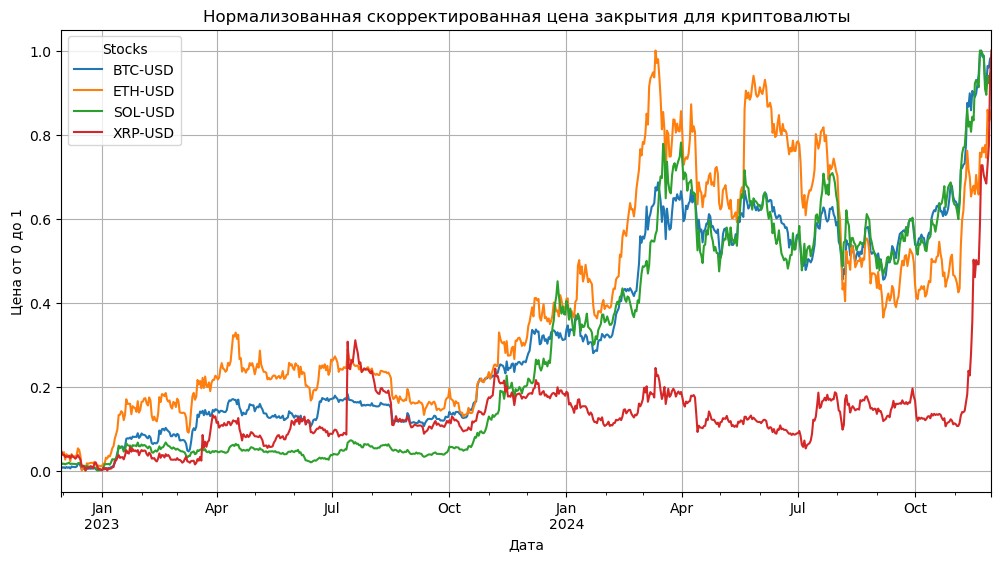

In [32]:
# Нормализуем цену

scaler = MinMaxScaler()
scaled_adj_close = pd.DataFrame(
    scaler.fit_transform(adj_close_crypto_df),
    columns=adj_close_crypto_df.columns,
    index=adj_close_crypto_df.index
)


# Plot the scaled data
scaled_adj_close.plot(figsize=(12, 6), title="Нормализованная скорректированная цена закрытия для криптовалюты")
plt.xlabel("Дата")
plt.ylabel("Цена от 0 до 1")
plt.grid(True)
plt.legend(title="Stocks", loc="upper left")
plt.show()

In [33]:
# Ищем выбросы
# Вычисление среднего и стандартного отклонения
mean = adj_close_crypto_df.mean()
std = adj_close_crypto_df.std()

# Границы для выбросов
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Фильтрация выбросов
outliers = adj_close_crypto_df[(adj_close_crypto_df < lower_bound) | (adj_close_crypto_df > upper_bound)]

outliers.isna().sum()

Date
BTC-USD    732
ETH-USD    732
SOL-USD    732
XRP-USD    717
dtype: int64

In [34]:
outliers

Date,BTC-USD,ETH-USD,SOL-USD,XRP-USD
Date,,,,
2022-11-30,NaN,NaN,NaN,NaN
2022-12-01,NaN,NaN,NaN,NaN
2022-12-02,NaN,NaN,NaN,NaN
2022-12-03,NaN,NaN,NaN,NaN
2022-12-04,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-11-26,NaN,NaN,NaN,1.401323
2024-11-27,NaN,NaN,NaN,1.472812
2024-11-28,NaN,NaN,NaN,1.541343


In [ ]:
# Тут есть явные выбросы, после 21го ноября цены влзелетли и не укладываются в коно 6 стандартных отклонений от среднего